# The Problem
Through exploratory analysis, I hope to answer the following questions about the Olympics:
1. Which countries have performed the best historically? In the Summer vs. Winter Games?
2. Does a country’s population or GDP per capita impact how well it performs?

The first qeustion is relevant because it showcases what countries have performed well in specific sports over time. We may see trends that indicate a country has performed better or worse in the past than they do now. It is possible that a countries population or GPD has a correlation with their performance and that is what I hope to answer with the second qeustion. Fans, athletes, and even coaches may care about the answers to these qeustions to see who is considered "the best" and if resources such as population or GDP affect performance.

# The Data
The dataset used in this project was uploaded by a user named Hassan Jameel Ahmed on kaggle.com. The dataset contains 120 years of data for the summer and winter olympics.
The dataset includes the following (coppied from the kaggle.com description):

SummerSD.csv
- Year (Integer): Year of the Olympics.
- City (String): Host city.
- Sport (String): Main sport category (e.g., Aquatics).
- Discipline (String): Specific discipline (e.g., Swimming).
- Athlete (String): Name of the athlete.
- Code (String): 3-letter Country Code (IOC code).
- Gender (String): Gender of the athlete (Men/Women).
- Event (String): Specific event name (e.g., 100M Freestyle).
- Medal (String): Medal won (Gold, Silver, Bronze).
- Country (String): Full country name.

WinterSD.csv
- Year (Integer): Year of the Olympics.
- City (String): Host city.
- Sport (String): Main sport category.
- Discipline (String): Specific discipline.
- Athlete (String): Name of the athlete.
- Country (String): In this file, this column acts as the 3-letter Code (e.g., FRA), not the full name.
- Gender (String): Gender of the athlete.
- Event (String): Specific event name.
- Medal (String): Medal won.

CountriesSD.csv
- Country (String): Full country name.
- Code (String): 3-letter IOC/ISO Code.
- Population (Float): Population count (Year variable dependent, likely recent).
- GDP per Capita (Float): GDP per capita in USD.

The key features in this dataset that are useful for answering the qeustions are Year, Country/Code, Medal, Population, & GDP per Capita.

In [411]:
# Import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import matplotlib.pyplot as plt

In [412]:
# Import the datasets
summer_data=pd.read_csv("SummerSD.csv")
winter_data=pd.read_csv("WinterSD.csv")
country_data=pd.read_csv("CountriesSD.csv")

In [413]:
# Look at the first five rows
summer_data.head()


,Unnamed: 0,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [414]:
# Look at the first five rows
winter_data.head()

,Unnamed: 0,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [415]:
# Look at the first five rows
country_data.head()

,Unnamed: 0,Country,Code,Population,GDP per Capita
0,0,Afghanistan,AFG,32526562.0,594.323081
1,1,Albania,ALB,2889167.0,3945.217582
2,2,Algeria,ALG,39666519.0,4206.031232
3,3,American Samoa*,ASA,55538.0,NaN
4,4,Andorra,AND,70473.0,NaN


In [416]:
# Get information about datatypes
summer_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  31165 non-null  int64
 1   Year        31165 non-null  int64
 2   City        31165 non-null  str  
 3   Sport       31165 non-null  str  
 4   Discipline  31165 non-null  str  
 5   Athlete     31165 non-null  str  
 6   Code        31161 non-null  str  
 7   Gender      31165 non-null  str  
 8   Event       31165 non-null  str  
 9   Medal       31165 non-null  str  
 10  Country     25742 non-null  str  
dtypes: int64(2), str(9)
memory usage: 2.6 MB


In [417]:
# Get information about datatypes
winter_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  5770 non-null   int64
 1   Year        5770 non-null   int64
 2   City        5770 non-null   str  
 3   Sport       5770 non-null   str  
 4   Discipline  5770 non-null   str  
 5   Athlete     5770 non-null   str  
 6   Country     5770 non-null   str  
 7   Gender      5770 non-null   str  
 8   Event       5770 non-null   str  
 9   Medal       5770 non-null   str  
dtypes: int64(2), str(8)
memory usage: 450.9 KB


In [418]:
# Get information about datatypes
country_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      201 non-null    int64  
 1   Country         201 non-null    str    
 2   Code            201 non-null    str    
 3   Population      196 non-null    float64
 4   GDP per Capita  176 non-null    float64
dtypes: float64(2), int64(1), str(2)
memory usage: 8.0 KB


In [419]:
# Check how much data is missing
summer_data.isnull().sum()

Unnamed: 0       0
Year             0
City             0
Sport            0
Discipline       0
Athlete          0
Code             4
Gender           0
Event            0
Medal            0
Country       5423
dtype: int64

In [420]:
# Check how much data is missing
winter_data.isnull().sum()

Unnamed: 0    0
Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [421]:
# Check how much data is missing
country_data.isnull().sum()

Unnamed: 0         0
Country            0
Code               0
Population         5
GDP per Capita    25
dtype: int64

# Data Cleaning & Preparation
To clean the dataset the following things need to be done:
- Fix inconsitencies among Country names and Codes in Summer and Winter datasets.
- Drop data with missing countries. A row might have missing country data for a few reasons (the country is unknown or the athlete competed independently)
- Drop countries with missing population or GDP values when looking at correlation.
- Remove duplicates if they exists
- Create a column to calculate medal totals with the  weights (Gold=3, Silver=2, Bronze=1)

In [422]:
# Rename "Country" column to "Code" in winter dataset because it contains the 3 letter country code
winter_data.rename(columns={"Country": "Code"}, inplace=True)

In [423]:
# Remove duplicate entries
summer_data.drop_duplicates(inplace=True)
winter_data.drop_duplicates(inplace=True)
country_data.drop_duplicates(inplace=True)

In [424]:
# Drop rows with missing country code in the summer dataset
summer_data.dropna(subset=["Code"], inplace=True)
summer_data.isna().sum()

Unnamed: 0       0
Year             0
City             0
Sport            0
Discipline       0
Athlete          0
Code             0
Gender           0
Event            0
Medal            0
Country       5419
dtype: int64

In [425]:
# Create a dictonary for medal weights
medal_weights = {"Gold": 3, "Silver": 2, "Bronze": 1}
# Create a new column "Medal Weight" in the summer and winter datasets
summer_data["Medal Weight"] = summer_data["Medal"].map(medal_weights)
winter_data["Medal Weight"] = winter_data["Medal"].map(medal_weights)

In [426]:
# Drop countries with no GPD or population data from datasets
country_data_population_clean = country_data.dropna(subset=["Population"])
country_data_gdp_clean = country_data.dropna(subset=["GDP per Capita"])
print(country_data_population_clean.isna().sum())
print(country_data_gdp_clean.isna().sum())

Unnamed: 0         0
Country            0
Code               0
Population         0
GDP per Capita    20
dtype: int64
Unnamed: 0        0
Country           0
Code              0
Population        0
GDP per Capita    0
dtype: int64


# Data Visualization

Text(0, 0.5, 'Total Medals (Weighted)')

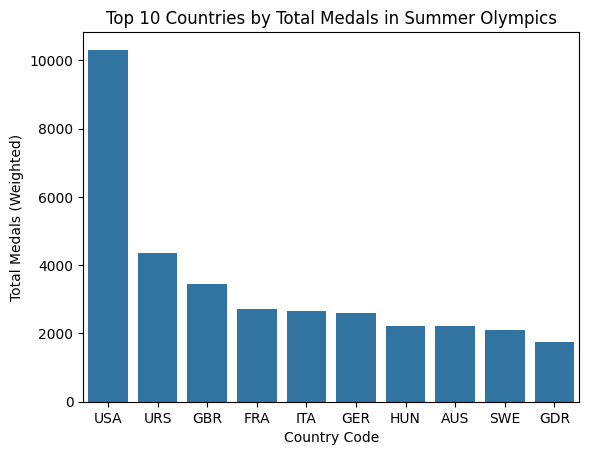

In [427]:
# Create dataframe with top 10 countries by total medals (weighted) in summer olympics
summer_data_by_country = summer_data.groupby("Code")["Medal Weight"].sum().reset_index() # Group by country code, select "Medal Weight" column, sum medal weights
top_10_summer = summer_data_by_country.sort_values("Medal Weight", ascending=False).head(10)
# Bar chart countries by total medal (weighted) in summer olympics
sns.barplot(data=top_10_summer, x="Code", y="Medal Weight")
plt.title("Top 10 Countries by Total Medals in Summer Olympics")
plt.xlabel("Country Code")
plt.ylabel("Total Medals (Weighted)")

Text(0, 0.5, 'Total Medals (Weighted)')

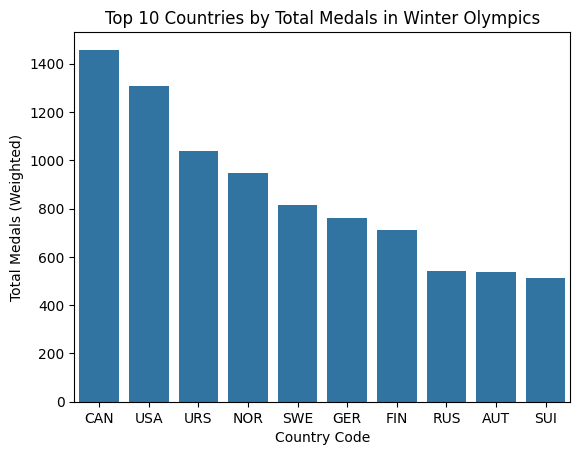

In [428]:
# Create dataframe with top 10 countries by total medals (weighted) in winter olympics
winter_data_by_country = winter_data.groupby("Code")["Medal Weight"].sum().reset_index() # Group by country code, select "Medal Weight" column, sum medal weights
top_10_winter = winter_data_by_country.sort_values("Medal Weight", ascending=False).head(10)
# Bar chart countries by total medal (weighted) in winter olympics
sns.barplot(data=top_10_winter, x="Code", y="Medal Weight")
plt.title("Top 10 Countries by Total Medals in Winter Olympics")
plt.xlabel("Country Code")
plt.ylabel("Total Medals (Weighted)")

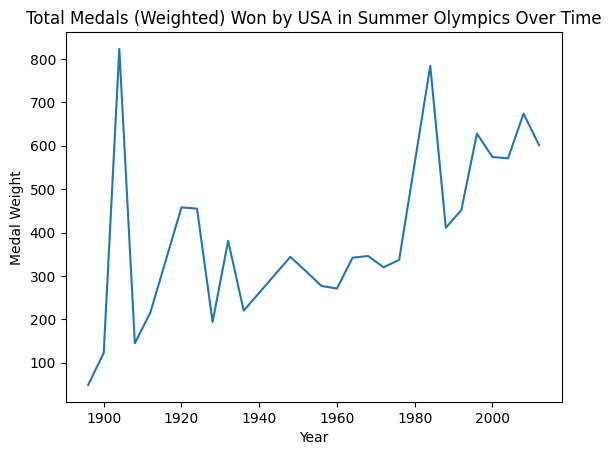

In [429]:
# Create dataframe with total medals (weighted) won by the United States in the summer olympics over time
usa = summer_data[summer_data["Code"]=="USA"].groupby("Year", as_index=False)["Medal Weight"].sum() # Select "USA", group by "Year", select "Medal Weight", sum medal weights
# Line plot of total medals (weighted) won by the United States in the summer olympics over time
sns.lineplot(data=usa, x="Year", y="Medal Weight")
plt.title("Total Medals (Weighted) Won by USA in Summer Olympics Over Time")
plt.show()

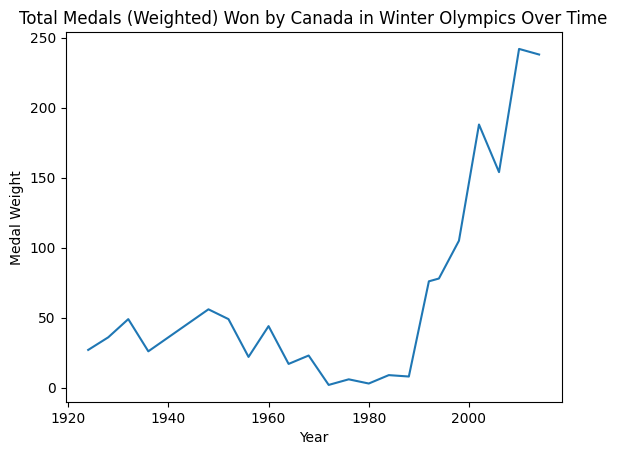

In [430]:
# Create dataframe with total medals (weighted) won by Canada in the winter olympics over time
can = winter_data[winter_data["Code"]=="CAN"].groupby("Year", as_index=False)["Medal Weight"].sum() # Select "CAN", group by "Year", select "Medal Weight", sum medal weights
# Line plot of total medals (weighted) won by Canada in the winter olympics over time
sns.lineplot(data=can, x="Year", y="Medal Weight")
plt.title("Total Medals (Weighted) Won by Canada in Winter Olympics Over Time")
plt.show()

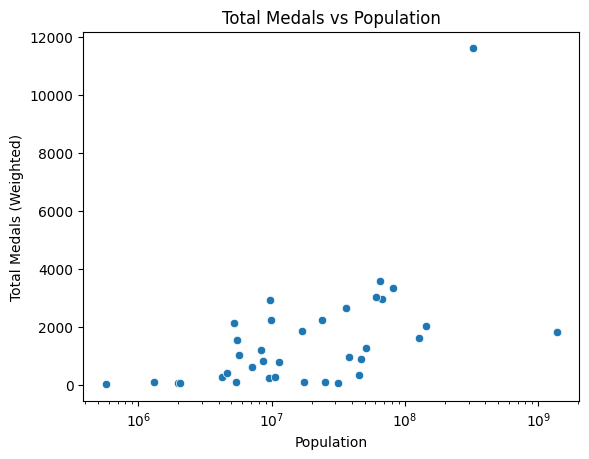

In [431]:
country_data["Total Medal Weight"] = ( # Create new column "Total Medal Weight"
    country_data["Code"].map(summer_data.groupby("Code")["Medal Weight"].sum()) # Map country code to total medal weight in summer olympics
    + country_data["Code"].map(winter_data.groupby("Code")["Medal Weight"].sum()) # Map country code to total medal weight in winter olympics
)
# Scatter plot of total medal weight vs population
sns.scatterplot(data=country_data, x="Population", y="Total Medal Weight")
plt.title("Total Medals vs Population")
plt.xlabel("Population")
plt.ylabel("Total Medals (Weighted)")
plt.xscale("log")


Text(0, 0.5, 'Total Medals (Weighted)')

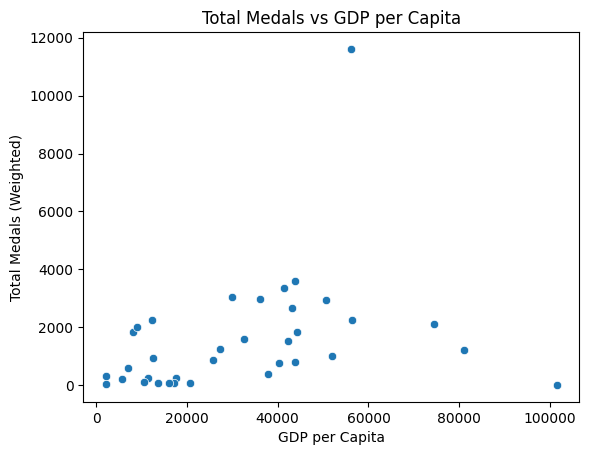

In [432]:
# Scatter plot of total medal weight vs GDP per capita
sns.scatterplot(data=country_data, x="GDP per Capita", y="Total Medal Weight")
plt.title("Total Medals vs GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Total Medals (Weighted)")

# References & AI Use Transparency
Data source: https://www.kaggle.com/datasets/hassanjameelahmed/olympic-dataset/data

Portions of code were copied (and then edited) from previous in-class studio notes/assignments. Additionally, GitHub Copilot was occasionally used to write code with its Inline Suggestions feature.